# Haciendo la grafica de dmf-2 corregida

refP e[-1]-1569.858219101517
refP A + B: -1569.8339189266098
S         0.0660895      1.0955162     -0.4799250
Na        4.0968214    -12.2650098     -0.2130885
O         -2.7734945     -2.5453281     -0.8228598
O         -0.6863469     -1.6921390      1.6700216
O         -4.3821151     -1.3902356      0.2667889
O         0.9031513     -1.9865012      0.0907920
O         -0.8736190      2.0731355     -1.1627963
O         0.2003046      1.5332123      0.9649666
O         1.3247097      0.8426759     -1.1850419
C         -3.1501389     -1.5382940     -0.2639244
C         -2.3359745     -0.2702777     -0.0897183
C         -0.8681579     -0.5019996     -0.4305110
C         -0.2249257     -1.4513270      0.5749102
C         1.6027827     -2.8666582      0.9858427
C         -5.2450093     -2.5336333      0.1417560
H         -2.4378491      0.0721459      0.9437043
H         -2.7501593      0.5017731     -0.7463498
H         -0.7545976     -0.9132126     -1.4359993
H         2.4876801     -3.

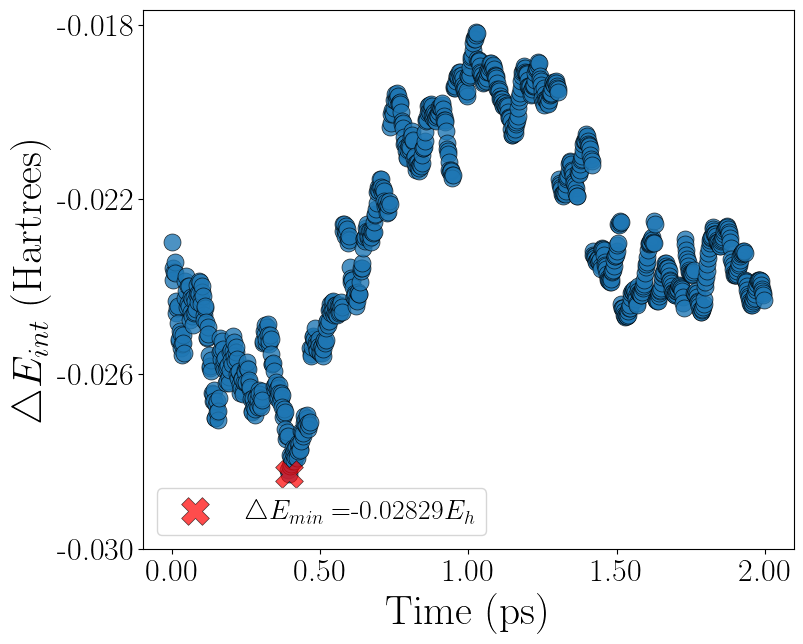

aot-dmf-2-bg.pdf


In [5]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antadlp/aot-dmf-2"

plabel = "dmf-2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 36
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def

print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values


df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"


plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

yts, labels = plt.yticks()
yts = yts[::2]
syts = [f'{np.round(yt, decimals=4):.3f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)



####################################

ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [6]:
# https://youtu.be/we3JF90c0P4

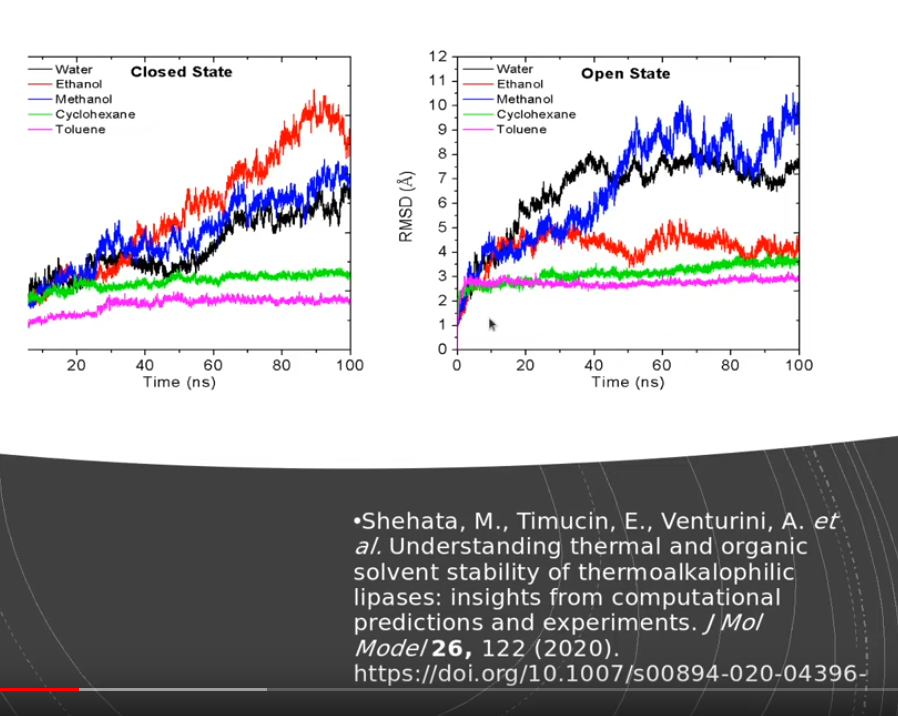

In [18]:
from IPython.display import Image
Image(filename="one-dim-rmsd.png")



In [11]:
!conda config --add channels conda-forge

In [ ]:
!conda install mdanalysis -y # ok

In [13]:
#!/usr/bin/python
from __future__ import print_function
import sys
import subprocess
import os
from itertools import *
import math as M
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# from:

# https://github.com/bafgreat/Pairwise-RMSD/tree/main

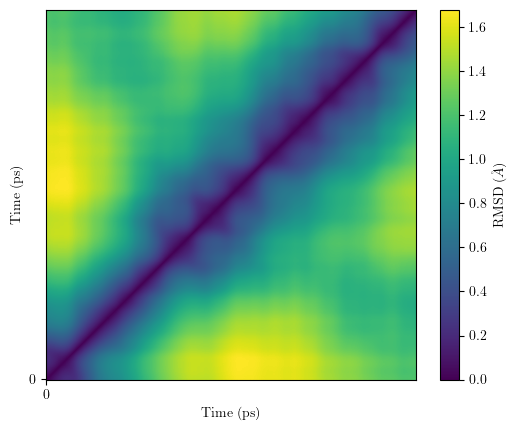

In [16]:
#Defining important functions


qcin = "dmf-2.xyz"

def get_contents(filename):
    """
    Function to read the content of a file
    """
    with open(filename, 'r') as f:
        contents = f.readlines()
    return contents

    
def All_Coordinates(qcin):
    """
    A comprehensive function to pull out XYZ coordinates from an XYZ trajectory file
    """
    qc_input = get_contents(qcin)
    temp =[]
    Coords =[]
   
    for line in qc_input:
        data = line.split()
        if len(data) >= 4:
            temp.append([float(i) for i in data[1:4]])
        else:
            if len(temp) !=0:
                Coords.append(temp)
            temp =[]
    return  Coords
    
    
def Align_to_Ref(Ref, Coords):
    """
    Function that aligns a coordinate to a reference in order to minimise the RMSD
    """

    
    #find the center of each coordinates
    center_0 = np.mean(Ref, axis=0)
    center_1 = np.mean(Coords, axis=0)
    
    #Center each coordinate
    centered_ref = Ref - center_0
    coord_to_com = Coords - center_1
    
    # Find the rotation that will align coord to Ref
    #Computation of the covariance matrix
    M = np.dot(np.transpose(coord_to_com),centered_ref)
    #M = coord_1.transpose().dot(coord_0)
    
    #computing the SVD of the covariance matrix
    U,S, V_H = np.linalg.svd(M)
    
    #Decide whether we need to correct our rotation matrix to ensure a right-handed coordinate system
    d = (np.linalg.det(U) * np.linalg.det(V_H)) < 0.0
    if d:
        S[-1] = -S[-1]
        U[:, -1] = -U[:, -1]
        
    #Compute rotation matrix
    Rotation_Matrix = np.dot(U, V_H)
    # Align the two sets of coordinates and calculate the RMSD
    aligned_coords = coord_to_com.dot(Rotation_Matrix)
    
    return aligned_coords, centered_ref
    
def RMSD(Ref, Coords):
    """
    Function that computes the RMSD between two coordinates
    """
    aligned_coords, centered_ref = Align_to_Ref(Ref, Coords)
    
    distance = list(map(lambda i, j :np.linalg.norm(i-j)**2 ,aligned_coords, centered_ref))
    
    rmsd = M.sqrt(sum(distance)/float(len(centered_ref)))
    return rmsd

#Main part of the program

#Read trajectory coordinates
Coordinates= All_Coordinates(qcin)

#computing pairwise RMSD
rmsd= starmap(RMSD, product(Coordinates, Coordinates))

#reshaping 1D list into numpy matrix for easy density plot
distance= np.array(list(rmsd)).reshape(len(Coordinates), len(Coordinates))

#Plotting pairwise RMSD
ticks =np.arange(0, len(distance)+1, 1000)
label = np.arange(0, len(ticks), 1)

plt.imshow(distance , cmap='viridis', origin='lower')
plt.xlabel(r'Time (ps)')
plt.ylabel(r'Time (ps)')
plt.xticks(ticks, label)
plt.yticks(ticks, label)
plt.colorbar(label=r'RMSD ($\AA$)')
plt.savefig('RMSD.png',dpi=2000, bbox_inches = 'tight')
#plt.show()